In [1]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [18]:
fname = "kay_labels.npy"
fname = "kay_images.npz"

In [19]:
with np.load(fname) as dobj:
    dat = dict(**dobj)
labels = np.load('kay_labels.npy')

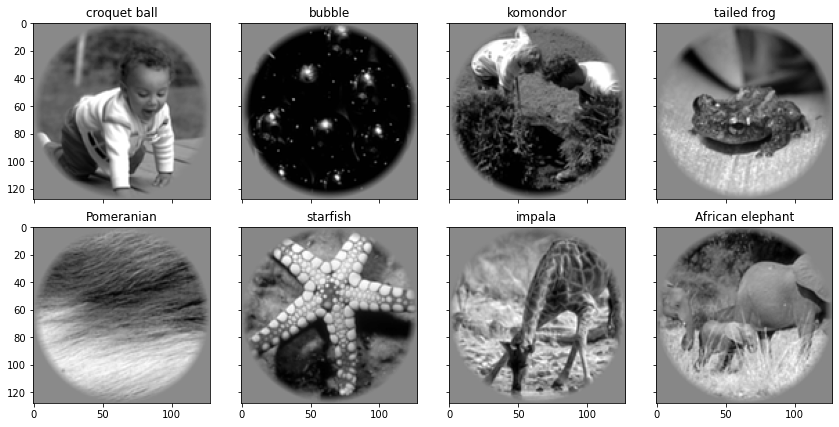

In [4]:
f, axs = plt.subplots(2, 4, figsize=(12, 6), sharex=True, sharey=True)
for ax, im, lbl in zip(axs.flat, dat["stimuli"], labels[-1,:]):
    ax.imshow(im, cmap="gray")
    ax.set_title(lbl)
f.tight_layout()

In [8]:
labels1 = pd.read_csv("labels.csv")
labels1

,1,2
0,baby,baby
1,stars,sky
2,farmers,hay
3,frog,frog
4,hair,hair
...,...,...
1745,fish,fish
1746,chameleon,gecko
1747,mosque,building
1748,building,building


In [9]:
labels1['2'].values

array(['baby', 'sky', 'hay', ..., 'building', 'building', 'airplane'],
      dtype=object)

In [11]:
for i in range(len(labels[-1,:])):
    stimuli = dat["stimuli"][i, :, :]
    img = Image.fromarray((stimuli +1) / 2 * 255)
    if img.mode != 'RGB':
        img = img.convert('L')
    img.save('stimuli\\'+str(i)
             + "_" + labels[0,:][i]
             + "_" + str(labels1['1'].values[i])
             + "_" + str(labels1['2'].values[i])
             +'.jpg')

In [ ]:
stimuli.min()

In [ ]:
plt.imshow(im, cmap="gray")

## test set

In [3]:
fname = "kay_labels_val.npy"

In [4]:
val_labels = np.load('kay_labels_val.npy')
val_labels.shape

In [11]:
val_labels[:,0]

array(['artifact', 'structure', 'bridge', 'steel arch bridge'],
      dtype='<U71')

'artifact'

In [23]:
for i in range(len(val_labels[-1,:])):
    lab = [str(i) for i in val_labels[:,i]]
    stimuli = dat["stimuli_test"][i, :, :]
    img = Image.fromarray((stimuli +1) / 2 * 255)
    if img.mode != 'RGB':
        img = img.convert('L')
    img.save('stimuli_test\\'+str(i)
             + "_" + lab[3]
             + "_" + lab[2]
             + "_" + lab[1]
             + "_" + lab[0]
             +'.jpg')